In [1]:
# import libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import json
import csv
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:

consumer_key = '8P6X8bfdKY2mIIDyCesnF7f9b'
consumer_secret = 'O1V6KkCJNGegcVoom44WhtXj5KZIRJdergPxzU2pyPk1WHXA5b'
access_token = '1330861130336485382-guov1EOcyoMWppuY4Ga4LhAFjrkbaB'
access_token_secret = 'BDofYXwSB3sQXQlEO2fxjWHjuvThoG3XH3COqGcGmZYdS'
hashtag_phrase = input("Enter the keyword: ") 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)    

api = tweepy.API(auth)



post = tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', lang="en", tweet_mode='extended')



Enter the keyword: #Trump


In [15]:
df = pd.DataFrame( [tweet.full_text for tweet in post.items(100)], columns=['Tweets'])

df.head(10)

,Tweets
0,@Kladybug101 @Jov11an @twk4usa @fritzy2you @pc...
1,National Security https://t.co/i4JvSM0Dti #pol...
2,@ryanobles @CodyAlcorn HAHAHAHAHA! They can’t ...
3,DOCUMENT: Sworn Affidavit Eyewitness Of Spoile...
4,"Problems can be solved\nif we know\nWHAT, WHER..."
5,"Ronald Rump beat covid, that dont mean he aint..."
6,@realDonaldTrump So now because #Trump and the...
7,#Trump hasn't tweeted in the last 2 hours! May...
8,Intel experts fear that #trump may sell state ...
9,#Trump's Campaign Lost In Court — Again — Tryi...


In [16]:
# clean the text

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]','', text)
    text = re.sub(r'https?:\/\/\S+','', text)
#     text = re.sub(r'_','', text)
    
    return text
 
# show clean text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()

,Tweets
0,@_red_pill_USA _Deplorables _J...
1,National Security politics trump nationalsecu...
2,HAHAHAHAHA! They can’t get their story strai...
3,DOCUMENT: Sworn Affidavit Eyewitness Of Spoile...
4,"Problems can be solved\nif we know\nWHAT, WHER..."


In [5]:
# create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,".HarryKane played cricket,jokingly asks Kohli ...",1.0000,0.25
1,This is the kind of cricket game (white unifor...,0.5500,0.20
2,Can't trust these Australians. They got paid...,0.0000,0.00
3,Ask to play IPL INDvAUS,0.0000,0.00
4,Glen Maxwell reacts on a meme post on Twitter!...,0.0000,0.00
...,...,...,...
95,"IPL 2020: KXIP fan calls KL Rahul 'Thala', his...",0.4000,0.80
96,AUSvsIND \n1st odi \nBowling department failed...,0.1500,-0.25
97,Haha Harry some great shots bro... nice du...,0.5125,0.40
98,"Agar fraud and cheating ka case lagana hai, to...",0.0000,0.00


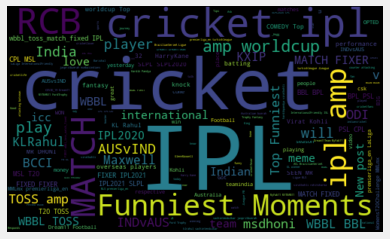

In [6]:
# Plot the word cloud

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [7]:
# create a function to compute negative, nutral and negative analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df


,Tweets,Subjectivity,Polarity,Analysis
0,".HarryKane played cricket,jokingly asks Kohli ...",1.0000,0.25,Positive
1,This is the kind of cricket game (white unifor...,0.5500,0.20,Positive
2,Can't trust these Australians. They got paid...,0.0000,0.00,Neutral
3,Ask to play IPL INDvAUS,0.0000,0.00,Neutral
4,Glen Maxwell reacts on a meme post on Twitter!...,0.0000,0.00,Neutral
...,...,...,...,...
95,"IPL 2020: KXIP fan calls KL Rahul 'Thala', his...",0.4000,0.80,Positive
96,AUSvsIND \n1st odi \nBowling department failed...,0.1500,-0.25,Negative
97,Haha Harry some great shots bro... nice du...,0.5125,0.40,Positive
98,"Agar fraud and cheating ka case lagana hai, to...",0.0000,0.00,Neutral


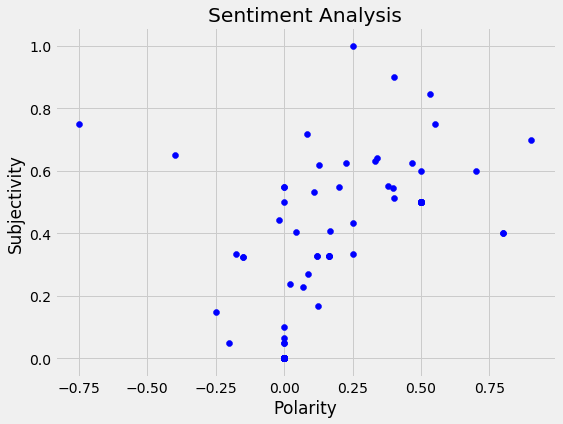

In [8]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [9]:
# Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100,1)

48.0

In [10]:
# Get percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100,1)

8.0

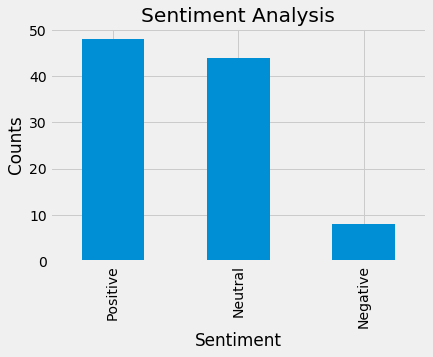

In [11]:
# show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()